# Pseudospectral Methods 1
Sean Wade

In [14]:
from __future__ import division

In [50]:
import numpy as np
from scipy.interpolate import barycentric_interpolate
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import root
import seaborn as sns

In [2]:
%matplotlib inline

## Problem 1

In [3]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x # D is L_ij, x pints have to use

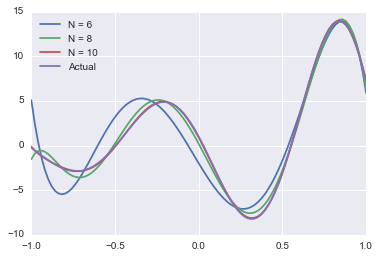

In [4]:
u = lambda x: np.exp(x) * np.cos(6*x)
u_prime = lambda x: np.exp(x) * np.cos(6*x) - np.exp(x) * np.sin(6*x) * 6
for N in [6, 8, 10]:
    D, x = cheb(N)
    y_hat = np.dot(D, u(x))
    grid = np.linspace(-1,1,100)
    y = barycentric_interpolate(x, y_hat, grid)
    plt.plot(grid, y, label='N = %d' % N)
plt.plot(grid, u_prime(grid), label='Actual')
plt.legend(loc='upper left')
plt.show()

## Problem 2

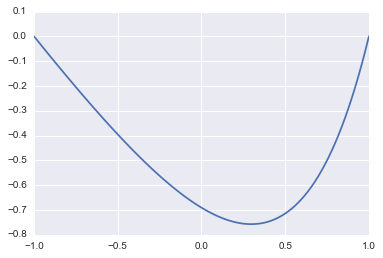

In [17]:
f = lambda x: np.exp(2*x)
D, x = cheb(8)
F = f(x)
D2 = np.dot(D, D)
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1
F[0], F[-1] = 0, 0
u = np.linalg.solve(D2, F)
grid = np.linspace(-1,1,100)
y_hat = barycentric_interpolate(x, u, grid)
plt.plot(grid, y_hat)
plt.show()

## Problem 3

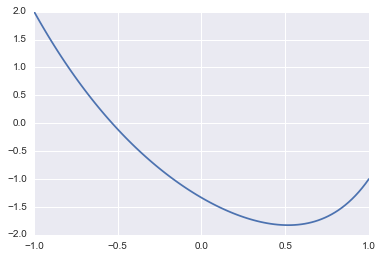

In [23]:
f = lambda x: np.exp(3*x)
D, x = cheb(8)
D_new = np.dot(D, D) + D
F = f(x)
D_new[0,:], D_new[-1,:] = 0, 0
D_new[0,0], D_new[-1,-1] = 1, 1
F[0], F[-1] = -1, 2
u = np.linalg.solve(D_new, F)
grid = np.linspace(-1,1,100)
y_hat = barycentric_interpolate(x, u, grid)
plt.plot(grid, y_hat)
plt.show()

## Problem 4

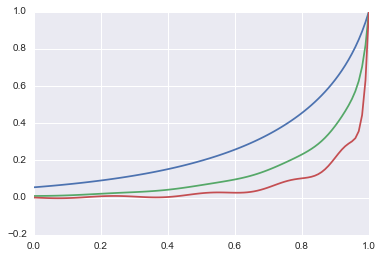

In [48]:
N = 20
D, x = cheb(N)
D2 = np.dot(D, D)
for lmbda in [5, 8, 12]:
    def F(u):
        out = 4 * np.dot(D2, u) - lmbda * np.sinh(lmbda * u)
        out[-1], out[0] = u[-1], u[0] - 1
        return out

    guess = np.ones(N+1)
    u = root(F, guess).x

    grid = np.linspace(0,1,100)
    y_hat = barycentric_interpolate(x, u, grid)
    plt.plot(grid, y_hat)
plt.show()

## Problem 5

In [74]:
N = 50
D, x = cheb(N)

def F(Y):
        out = Y * np.dot(D, D).dot(Y) - np.dot(D, Y)**2 - np.ones(len(Y))
        out[-1], out[0] = Y[-1] - 1, Y[0] - 7
        return out
    
guess = 2*np.ones(N+1)
u = root(F, guess).x

grid = np.linspace(-1,1,100)

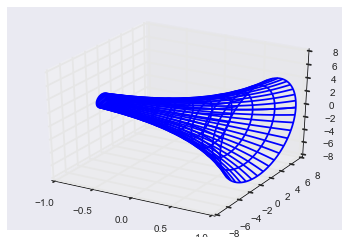

In [75]:
barycentric = barycentric_interpolate(x, u, grid)
lin = np.linspace(-1, 1, 100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()